In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.shape

(76020, 371)

In [3]:
df.sample(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
65330,130490,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
28947,57907,2,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212509.350000,0
60344,120452,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293435.160000,0


In [4]:
X=df.drop(columns=['TARGET'])
Y=df['TARGET']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [7]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [8]:
from sklearn.metrics import f1_score

Y_pred = pipeline.predict(X_test)
print(f"The f1 score is: {f1_score(Y_test, Y_pred)}")

The f1 score is: 0.05482233502538071


### Correlation

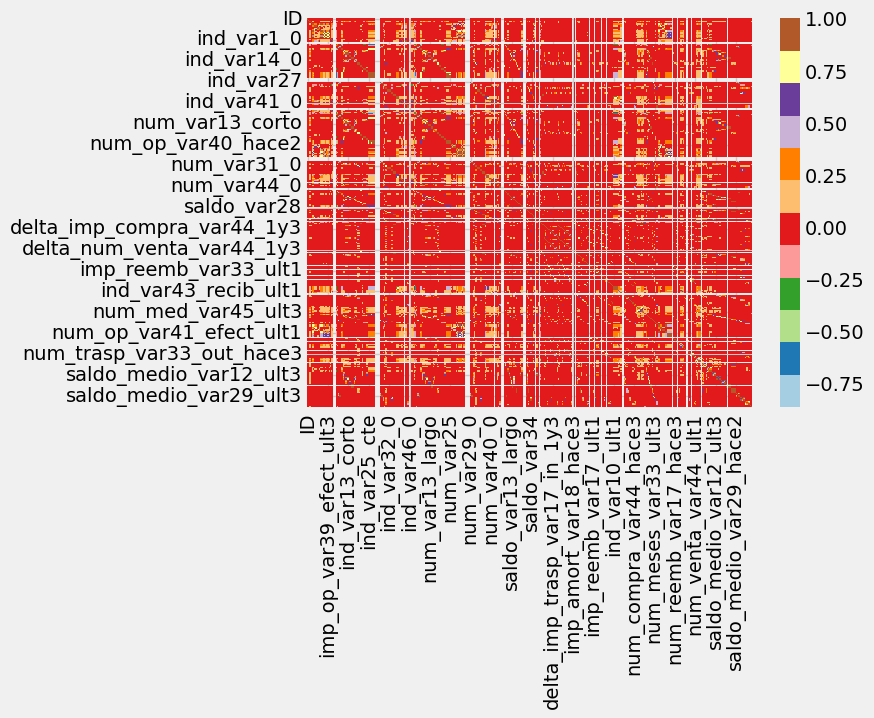

In [9]:
sns.heatmap(df.corr(),cmap='Paired')
plt.show()

In [10]:
corr_matrix=df.corr()

In [11]:
columns=corr_matrix.columns
deletion_list=[]

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if corr_matrix.loc[columns[i],columns[j]]>0.95:
            deletion_list.append(columns[j])

print(len(deletion_list))

227


In [12]:
deletion_list=set(deletion_list)
len(deletion_list)

130

In [13]:
X_train=X_train.drop(columns=deletion_list,axis=1)
X_test=X_test.drop(columns=deletion_list,axis=1)

In [14]:
X_train.shape,X_test.shape

((53214, 240), (22806, 240))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [16]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [17]:
from sklearn.metrics import f1_score

Y_pred = pipeline.predict(X_test)
print(f"The f1 score is: {f1_score(Y_test, Y_pred)}")

The f1 score is: 0.061037639877924724
